In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('KBY_grid_1input_03-Nov-2022 19:10:44_session_data.csv')
df.head()

,Trial,Subject_Time,Cue_Pos,Target_Pos
0,Valid-300,0.26626,"0,8","0,8"
1,Invalid-300,0.30476,"4,0","8,0"
2,Invalid-300,0.24846,"12,4","4,8"
3,Valid-100,0.42758,"8,0","8,0"
4,Valid-300,0.28068,"0,12","0,12"


In [9]:
len(df)

1280

In [10]:
trial_types = [ df['Trial'][i].split('-')[0] for i in range(len(df)) ]
trial_pings = [ int(df['Trial'][i].split('-')[1]) for i in range(len(df)) ]

df['Trial_Type'] = trial_types
df['Trial_Ping'] = trial_pings

df.head()

,Trial,Subject_Time,Cue_Pos,Target_Pos,Trial_Type,Trial_Pings
0,Valid-300,0.26626,"0,8","0,8",Valid,300
1,Invalid-300,0.30476,"4,0","8,0",Invalid,300
2,Invalid-300,0.24846,"12,4","4,8",Invalid,300
3,Valid-100,0.42758,"8,0","8,0",Valid,100
4,Valid-300,0.28068,"0,12","0,12",Valid,300


In [12]:
euc_dists = [ 
    np.sqrt((int(df['Cue_Pos'][i].split(',')[0]) - int(df['Target_Pos'][i].split(',')[0]))**2 + \
            (int(df['Cue_Pos'][i].split(',')[1]) - int(df['Target_Pos'][i].split(',')[1]))**2) \
    for i in range(len(df))
]

df['Euc_Distance'] = euc_dists

df.head()

,Trial,Subject_Time,Cue_Pos,Target_Pos,Trial_Type,Trial_Pings,Euc_Distance
0,Valid-300,0.26626,"0,8","0,8",Valid,300,0.000000
1,Invalid-300,0.30476,"4,0","8,0",Invalid,300,4.000000
2,Invalid-300,0.24846,"12,4","4,8",Invalid,300,8.944272
3,Valid-100,0.42758,"8,0","8,0",Valid,100,0.000000
4,Valid-300,0.28068,"0,12","0,12",Valid,300,0.000000


In [27]:
alignments = []
for i in range(len(df)):
    if df['Trial_Type'][i] == 'Invalid' and \
        df['Cue_Pos'][i].split(',')[0] == df['Target_Pos'][i].split(',')[0]:
        alignments.append('Vertical')
    elif df['Trial_Type'][i] == 'Invalid' and \
        df['Cue_Pos'][i].split(',')[1] == df['Target_Pos'][i].split(',')[1]:
        alignments.append('Horizontal')
    elif df['Trial_Type'][i] == 'Valid':
        alignments.append('Valid')
    else:
        alignments.append('Diagonal')
df['Alignment'] = alignments
df.head()

,Trial,Subject_Time,Cue_Pos,Target_Pos,Trial_Type,Trial_Pings,Euc_Distance,Alignment
0,Valid-300,0.26626,"0,8","0,8",Valid,300,0.000000,Valid
1,Invalid-300,0.30476,"4,0","8,0",Invalid,300,4.000000,Horizontal
2,Invalid-300,0.24846,"12,4","4,8",Invalid,300,8.944272,Diagonal
3,Valid-100,0.42758,"8,0","8,0",Valid,100,0.000000,Valid
4,Valid-300,0.28068,"0,12","0,12",Valid,300,0.000000,Valid


# Plots

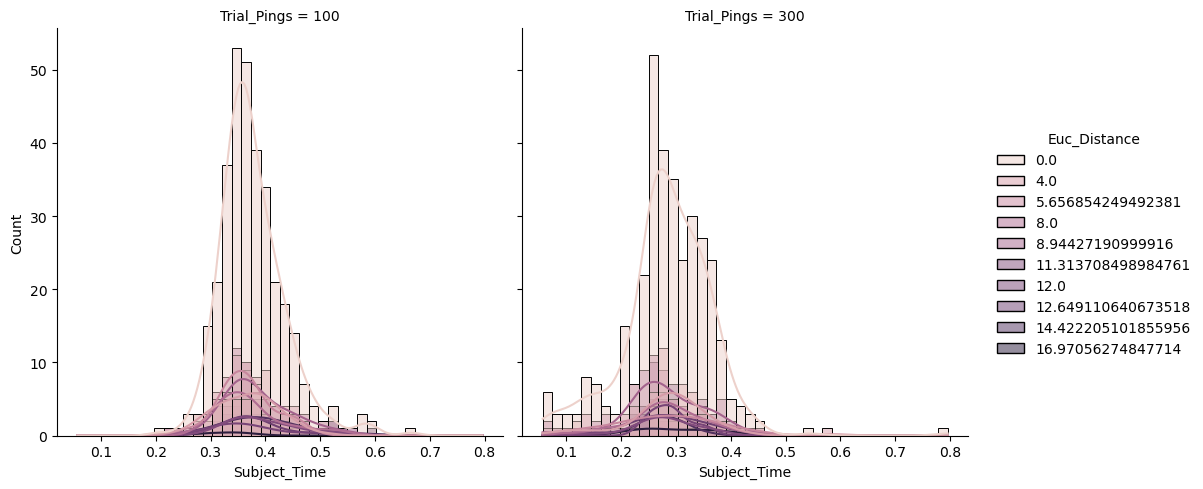

In [28]:
sns.displot(data=df, x='Subject_Time', hue='Euc_Distance', col='Trial_Pings', kde=True)
plt.show()

In [29]:
sns.scatterplot(data=df, x='Subject_Time', hue='Trial_Ping', size='Euc_Distance')

ValueError: Could not interpret value `Trial_Ping` for parameter `hue`